In [1]:
import os
os.chdir("../")
import torch
import warnings
warnings.filterwarnings('ignore')

import GCAST
os.environ["R_HOME"] =  "/public/home/ljquan/anaconda3/envs/myx/lib/R"
random_seed = 2025
device = "cuda:0" if torch.cuda.is_available() else "cpu"
packnames = ('mclust',)

## DLPFC-subject3 was utilized to evaluate the cross-slides performance of GCAST

In [2]:
data_root = "./Dataset/DLPFC"
sample_name = [
    "151673",
    "151674",
    "151675",
    "151676",
]
n_clusters = 7

## Preprocessing for batch-integrated DLPFC-subject3

In [3]:
GCAST.set_seed(random_seed)
adata, graph_dict = GCAST.Load10xST(data_root, sample_name, n_clusters, mode="batch", negi = 12, n_top_genes = 8000).data()
net = GCAST.GCAST(adata.obsm["X_pca"], graph_dict, device=device,model_path=f"{data_root}/subject", model_name="subject3")


100%|██████████| 4/4 [00:21<00:00,  5.33s/it]


In [4]:
net.train_with_dec()

 50%|████▉     | 497/1000 [03:45<03:48,  2.20it/s]


## Extract embedding for batch-integrated DLPFC-subject3 

> **Notes for reproducing the results**  
> 1. After loading the `adata` object and the corresponding graph using `Load10xST()`, you can skip the `train_with_dec()` step. 
> 2. The trained model `subject3.pth` are available at the following link: 
> https://zenodo.org/records/18723302 (in fold `../Dataset/DLPFC/subject/`).  
> 3. By loading the trained weights `../Dataset/DLPFC/subject/subject3.pth` and calling `net.eval()`, you can directly obtain the results.

In [5]:
# Calling net.eval() can load "../Dataset/DLPFC/subject/subject3.pth"
adata.obsm["emb"] = net.eval()
adata = GCAST.hm_integration(adata, harmony_key='emb')

2026-02-18 00:40:29,382 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2026-02-18 00:40:31,469 - harmonypy - INFO - sklearn.KMeans initialization complete.
2026-02-18 00:40:31,521 - harmonypy - INFO - Iteration 1 of 10
2026-02-18 00:40:33,859 - harmonypy - INFO - Iteration 2 of 10
2026-02-18 00:40:36,289 - harmonypy - INFO - Iteration 3 of 10
2026-02-18 00:40:38,719 - harmonypy - INFO - Iteration 4 of 10
2026-02-18 00:40:41,131 - harmonypy - INFO - Iteration 5 of 10
2026-02-18 00:40:43,566 - harmonypy - INFO - Iteration 6 of 10
2026-02-18 00:40:45,937 - harmonypy - INFO - Iteration 7 of 10
2026-02-18 00:40:48,455 - harmonypy - INFO - Iteration 8 of 10
2026-02-18 00:40:50,828 - harmonypy - INFO - Iteration 9 of 10
2026-02-18 00:40:53,171 - harmonypy - INFO - Iteration 10 of 10
2026-02-18 00:40:55,525 - harmonypy - INFO - Stopped before convergence


In [6]:
GCAST.mclust_R(adata, n_clusters=n_clusters, use_rep="emb", random_seed=random_seed)
GCAST.evaluate_cluster(adata)

R[write to console]:                    __           __ 
   ____ ___  _____/ /_  _______/ /_
  / __ `__ \/ ___/ / / / / ___/ __/
 / / / / / / /__/ / /_/ (__  ) /_  
/_/ /_/ /_/\___/_/\__,_/____/\__/   version 6.1.1
Type 'citation("mclust")' for citing this R package in publications.



fitting ...
  |======================================================================| 100%
mclust ARI:0.5713 NMI:0.6951 AMI:0.6948 purity:0.7781, homogeneity:0.6997, completeness:0.6904, v_measure:0.6951


## Results of spatial visualization

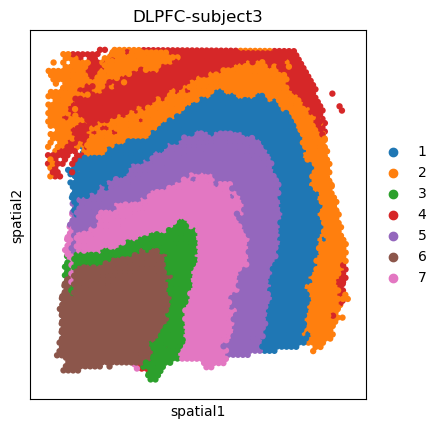

In [7]:
GCAST.plot_spatial(adata, color="mclust", title="DLPFC-subject3",  save=False, show=True)